In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression


In [ ]:
df=pd.read_csv("/content/HACKATHON_TRAINING_DATA.CSV")


In [ ]:
df.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,60.0,45625,NOV24,0,2032
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45687,JAN25,0,2033
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45656,DEC24,0,2034
3,9.127,1005500.0,1204287.25,17.878,9862,12736.0,Y,52.302,14.039,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,3.0,45625,NOV24,0,2035
4,9.296,1005500.0,1203224.25,17.708,9862,12736.0,Y,52.472,14.209,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,2.0,45687,JAN25,0,2036


 INDICATES

This is a binary indicator (usually 0 or 1) that tells whether a Standing Instruction (SI) has been set on the account.

🔍 What is a Standing Instruction?
A Standing Instruction is a pre-authorized instruction from a customer to the bank to automatically debit a fixed amount at regular intervals from their account—commonly used for:

Loan EMI payments
Credit card payments
Recurring bill payments (like rent, utilities)


In [ ]:
df.shape

(327741, 139)

In [ ]:
df.describe()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,AGE,VINTAGE,KYC_SCR,ONEMNTHCR,...,PRI_SANCTIONED_AMOUNT1,PRI_DISBURSED_AMOUNT1,PRIMARY_INSTAL_AMT1,NEW_ACCTS_IN_LAST_SIX_MONTHS1,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1,NO_OF_INQUIRIES1,LATEST_CR_DAYS,LATEST_DR_DAYS,TARGET,UNIQUE_ID
count,327741.000000,3.277410e+05,3.277410e+05,327728.000000,327741.000000,3.277410e+05,327739.000000,327739.000000,327317.000000,3.041660e+05,...,3.212500e+05,3.212500e+05,3.212500e+05,321250.000000,321250.000000,321250.000000,326277.000000,327741.000000,327741.000000,327741.000000
mean,4.637672,9.985971e+05,8.135074e+05,6.445420,4047.234356,1.449439e+04,40.409368,11.761791,114.086222,2.512426e+04,...,2.398679e+06,2.396957e+06,5.890236e+04,0.909933,0.631897,0.384688,49.824082,45656.179620,0.108134,251726.224693
std,3.898602,1.516311e+06,1.480803e+06,7.048248,3097.675869,1.582265e+04,11.393659,4.654792,19.414156,1.377432e+05,...,8.575373e+06,8.587500e+06,2.230916e+05,3.458905,1.496779,1.097248,103.648988,25.288253,0.310550,150253.968649
min,0.164000,1.470000e+04,0.000000e+00,-0.241000,183.000000,0.000000e+00,12.154000,0.222000,11.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,45625.000000,0.000000,1.000000
25%,1.706000,2.655000e+05,1.429155e+05,1.862000,2191.000000,6.541000e+03,31.149000,8.880000,110.000000,0.000000e+00,...,5.488020e+05,5.484052e+05,1.021900e+04,0.000000,0.000000,0.000000,13.000000,45625.000000,0.000000,119409.000000
50%,3.111000,6.655000e+05,4.295673e+05,3.976000,2434.000000,1.137800e+04,39.005000,11.772000,110.000000,9.798000e+01,...,1.165562e+06,1.165363e+06,2.004100e+04,0.000000,0.000000,0.000000,26.000000,45656.000000,0.000000,249616.000000
75%,6.498000,1.177500e+06,9.286602e+05,7.317000,6209.000000,1.894000e+04,48.920000,15.298000,110.000000,2.098657e+04,...,2.496327e+06,2.495000e+06,3.774200e+04,1.000000,1.000000,0.000000,59.000000,45687.000000,0.000000,379607.000000
max,26.454000,1.449055e+08,8.229750e+07,35.613000,13515.000000,1.313011e+06,123.101000,46.955000,440.000000,3.522228e+07,...,1.010685e+09,1.010281e+09,2.081798e+07,200.000000,35.000000,33.000000,2737.000000,45687.000000,1.000000,519434.000000


easy prediction model you have been given target 0 and 1 iss pe eak neural network ko train karna hai and another walein pe test karna haii use multiple models to evaluate the accuracy which parameteres are most suitable pehle toh ye dekho

In [ ]:
arr=df.columns
for i in arr:
    print(i)

ACCT_AGE
LIMIT
OUTS
ACCT_RESIDUAL_TENURE
LOAN_TENURE
INSTALAMT
SI_FLG
AGE
VINTAGE
KYC_SCR
LOCKER_HLDR_IND
UID_FLG
KYC_FLG
INB_FLG
EKYC_FLG
ONEMNTHCR
ONEMNTHSDR
ONEMNTHOUTSTANGBAL
ONEMNTHAVGMTD
ONEMNTHAVGQTD
ONEMNTHAVGYTD
TWOMNTHSCR
TWOMNTHSDR
TWOMNTHOUTSTANGBAL
TWOMNTHAVGMTD
TWOMNTHAVGQTD
TWOMNTHAVGYTD
THREEMNTHSCR
THREEMNTHSDR
THREEMNTHOUTSTANGBAL
THREEMNTHAVGMTD
THREEMNTHAVGQTD
THREEMNTHAVGYTD
FOURMNTHSCR
FOURMNTHSDR
FOURMNTHOUTSTANGBAL
FOURMNTHAVGMTD
FOURMNTHAVGQTD
FOURMNTHAVGYTD
FIVEMNTHSCR
FIVEMNTHSDR
FIVEMNTHOUTSTANGBAL
FIVEMNTHAVGMTD
FIVEMNTHAVGQTD
FIVEMNTHAVGYTD
SIXMNTHSCR
SIXMNTHSDR
SIXMNTHOUTSTANGBAL
SIXMNTHAVGMTD
SIXMNTHAVGQTD
SIXMNTHAVGYTD
SEVENMNTHSCR
SEVENMNTHSDR
SEVENMNTHOUTSTANGBAL
SEVENMNTHAVGMTD
SEVENMNTHAVGQTD
SEVENMNTHAVGYTD
EIGHTMNTHSCR
EIGHTMNTHSDR
EIGHTMNTHOUTSTANGBAL
EIGHTMNTHAVGMTD
EIGHTMNTHAVGQTD
EIGHTMNTHAVGYTD
NINEMNTHSCR
NINEMNTHSDR
NINEMNTHOUTSTANGBAL
NINEMNTHAVGMTD
NINEMNTHAVGQTD
NINEMNTHAVGYTD
TENMNTHSCR
TENMNTHSDR
TENMNTHOUTSTANGBAL
TENMNTHAVGMTD
TENMNT

In [ ]:
for i in arr:
     print(i,df[i].dtypes)


ACCT_AGE float64
LIMIT float64
OUTS float64
ACCT_RESIDUAL_TENURE float64
LOAN_TENURE int64
INSTALAMT float64
SI_FLG object
AGE float64
VINTAGE float64
KYC_SCR float64
LOCKER_HLDR_IND object
UID_FLG object
KYC_FLG object
INB_FLG object
EKYC_FLG object
ONEMNTHCR float64
ONEMNTHSDR float64
ONEMNTHOUTSTANGBAL float64
ONEMNTHAVGMTD float64
ONEMNTHAVGQTD float64
ONEMNTHAVGYTD float64
TWOMNTHSCR float64
TWOMNTHSDR float64
TWOMNTHOUTSTANGBAL float64
TWOMNTHAVGMTD float64
TWOMNTHAVGQTD float64
TWOMNTHAVGYTD float64
THREEMNTHSCR float64
THREEMNTHSDR float64
THREEMNTHOUTSTANGBAL float64
THREEMNTHAVGMTD float64
THREEMNTHAVGQTD float64
THREEMNTHAVGYTD float64
FOURMNTHSCR float64
FOURMNTHSDR float64
FOURMNTHOUTSTANGBAL float64
FOURMNTHAVGMTD float64
FOURMNTHAVGQTD float64
FOURMNTHAVGYTD float64
FIVEMNTHSCR float64
FIVEMNTHSDR float64
FIVEMNTHOUTSTANGBAL float64
FIVEMNTHAVGMTD float64
FIVEMNTHAVGQTD float64
FIVEMNTHAVGYTD float64
SIXMNTHSCR float64
SIXMNTHSDR float64
SIXMNTHOUTSTANGBAL float64
SIXMNT

OBJECT: AVERAGE_ACCT_AGE1
CREDIT_HISTORY_LENGTH1,INCOME_BAND1 ,AGREG_GROUP,PRODUCT_TYPE TIME_PERIOD

In [ ]:
object_cols = [
    "AVERAGE_ACCT_AGE1",
    "CREDIT_HISTORY_LENGTH1",
    "INCOME_BAND1",
    "AGREG_GROUP",
    "PRODUCT_TYPE",
    "TIME_PERIOD"
]

# Inspect unique values for each
for col in object_cols:
    print(f"\n--- {col} ---")
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts(dropna=False))



--- AVERAGE_ACCT_AGE1 ---
Unique values: ['2yrs 9mon' '3yrs 7mon' '0yrs 6mon' '0yrs 3mon' '1yrs 11mon' '0yrs 9mon'
 '1yrs 3mon' '3yrs 3mon' '1yrs 1mon' '2yrs 1mon' '0yrs 8mon' '3yrs 0mon'
 '4yrs 4mon' '1yrs 10mon' '0yrs 4mon' '0yrs 10mon' '1yrs 4mon' '1yrs 5mon'
 '0yrs 7mon' '2yrs 7mon' '3yrs 5mon' '1yrs 6mon' '1yrs 8mon' '2yrs 4mon'
 '2yrs 6mon' '6yrs 4mon' '4yrs 2mon' '2yrs 0mon' '1yrs 0mon' '2yrs 3mon'
 '5yrs 8mon' '1yrs 7mon' '1yrs 9mon' '5yrs 10mon' '4yrs 7mon' '0yrs 11mon'
 '2yrs 5mon' '2yrs 2mon' '5yrs 7mon' '0yrs 5mon' '3yrs 11mon' '1yrs 2mon'
 '6yrs 8mon' '2yrs 8mon' '7yrs 4mon' '3yrs 6mon' '4yrs 5mon' '4yrs 9mon'
 '2yrs 10mon' '4yrs 6mon' '3yrs 4mon' '5yrs 4mon' '4yrs 3mon' '2yrs 11mon'
 '8yrs 4mon' '4yrs 0mon' '3yrs 1mon' '5yrs 9mon' '11yrs 0mon' '5yrs 0mon'
 '4yrs 8mon' '7yrs 2mon' '3yrs 8mon' '4yrs 10mon' '4yrs 1mon' '3yrs 10mon'
 '3yrs 2mon' '3yrs 9mon' '6yrs 5mon' '6yrs 7mon' '5yrs 2mon' '9yrs 0mon'
 '10yrs 0mon' '5yrs 11mon' '8yrs 1mon' '5yrs 1mon' '4yrs 11mon'
 '7yrs 

### changing the object type to int or float

### 1.AVERAGE_ACCT_AGE1 and CREDIT_HISTORY_LENGTH1

In [ ]:
import re

def convert_to_months(x):
    if pd.isna(x):
        return np.nan
    match = re.match(r'(\d+)yrs\s+(\d+)mon', x)
    return int(match.group(1)) * 12 + int(match.group(2)) if match else np.nan

df['AVERAGE_ACCT_AGE1'] = df['AVERAGE_ACCT_AGE1'].apply(convert_to_months)
df['CREDIT_HISTORY_LENGTH1'] = df['CREDIT_HISTORY_LENGTH1'].apply(convert_to_months)

# Optional: Impute missing with median
df['AVERAGE_ACCT_AGE1'].fillna(df['AVERAGE_ACCT_AGE1'].median(), inplace=True)
df['CREDIT_HISTORY_LENGTH1'].fillna(df['CREDIT_HISTORY_LENGTH1'].median(), inplace=True)


<ipython-input-64-8f2d886396c1>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AVERAGE_ACCT_AGE1'].fillna(df['AVERAGE_ACCT_AGE1'].median(), inplace=True)
<ipython-input-64-8f2d886396c1>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

### 2. INCOME_BAND1

In [ ]:
income_band_map = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8,
    'EX01': 9, 'EX02': 10, 'EX04': 11, 'EX05': 12
}
df['INCOME_BAND1'] = df['INCOME_BAND1'].map(income_band_map)

# Optional: Fill NaN with median or 0
df['INCOME_BAND1'].fillna(df['INCOME_BAND1'].median(), inplace=True)


<ipython-input-65-bb40587df3ca>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INCOME_BAND1'].fillna(df['INCOME_BAND1'].median(), inplace=True)


### 3. AGREG_GROUP, PRODUCT_TYPE, TIME_PERIOD

In [ ]:
# One-hot encode
df = pd.get_dummies(df, columns=['AGREG_GROUP', 'PRODUCT_TYPE', 'TIME_PERIOD'], drop_first=True)


Code to Identify Non-Numeric Columns

In [ ]:
# Get columns not of int or float dtype
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Columns that are NOT int or float:")
for col in non_numeric_cols:
    print(f"{col} --> {df[col].dtype}")


Columns that are NOT int or float:
SI_FLG --> object
LOCKER_HLDR_IND --> object
UID_FLG --> object
KYC_FLG --> object
INB_FLG --> object
EKYC_FLG --> object
AGREG_GROUP_#Housing Loan --> bool
AGREG_GROUP_#Total Auto Loan --> bool
AGREG_GROUP_#Total Xpress Credit --> bool
PRODUCT_TYPE_EDUCATION LOAN --> bool
PRODUCT_TYPE_HOME LOAN --> bool
PRODUCT_TYPE_PERSONAL LOAN --> bool
TIME_PERIOD_JAN25 --> bool
TIME_PERIOD_NOV24 --> bool


Convert Boolean Columns to Integer

In [ ]:
# Identify boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert to integer type
df[bool_cols] = df[bool_cols].astype(int)

print(f"✅ Converted {len(bool_cols)} boolean columns to integers.")

✅ Converted 8 boolean columns to integers.


check remaining columns

In [ ]:
ck=['SI_FLG','LOCKER_HLDR_IND','UID_FLG','KYC_FLG','INB_FLG','EKYC_FLG']
for col in ck:
    print(f"\n--- {col} ---")
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts(dropna=False))



--- SI_FLG ---
Unique values: ['Y' 'N']
Value counts:
 SI_FLG
Y    254837
N     72904
Name: count, dtype: int64

--- LOCKER_HLDR_IND ---
Unique values: ['N' 'Y' nan]
Value counts:
 LOCKER_HLDR_IND
N      324383
Y        3356
NaN         2
Name: count, dtype: int64

--- UID_FLG ---
Unique values: ['Y' 'N' nan]
Value counts:
 UID_FLG
Y      293407
N       34332
NaN         2
Name: count, dtype: int64

--- KYC_FLG ---
Unique values: ['Y' 'N' '2' '1' nan]
Value counts:
 KYC_FLG
Y      326801
N         931
1           4
2           3
NaN         2
Name: count, dtype: int64

--- INB_FLG ---
Unique values: ['Y' 'N' nan]
Value counts:
 INB_FLG
Y      256945
N       70794
NaN         2
Name: count, dtype: int64

--- EKYC_FLG ---
Unique values: ['N' 'Y' nan]
Value counts:
 EKYC_FLG
N      311857
Y       15882
NaN         2
Name: count, dtype: int64


convert to int for training

In [ ]:
# List of binary flag columns
binary_flags = ['SI_FLG', 'LOCKER_HLDR_IND', 'UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG']

# Step 1: Drop rows where KYC_FLG is '1' or '2'
df = df[~df['KYC_FLG'].isin(['1', '2'])]

# Step 2: Convert Y/N to 1/0, leave NaNs as-is
for col in binary_flags:
    df[col] = df[col].map({'Y': 1, 'N': 0})

# Confirm changes
print("✅ Binary flags cleaned and KYC_FLG filtered. Remaining values:")
for col in binary_flags:
    print(f"{col} --> Unique values: {df[col].unique()}")


✅ Binary flags cleaned and KYC_FLG filtered. Remaining values:
SI_FLG --> Unique values: [1 0]
LOCKER_HLDR_IND --> Unique values: [ 0.  1. nan]
UID_FLG --> Unique values: [ 1.  0. nan]
KYC_FLG --> Unique values: [ 1.  0. nan]
INB_FLG --> Unique values: [ 1.  0. nan]
EKYC_FLG --> Unique values: [ 0.  1. nan]


<ipython-input-70-0b6aca541959>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Y': 1, 'N': 0})


In [ ]:
# check
# Get columns not of int or float dtype
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Columns that are NOT int or float:")
for col in non_numeric_cols:
    print(f"{col} --> {df[col].dtype}")


Columns that are NOT int or float:


NOW ALL THE COLUMNS ARE INTEGER TYPE / FLOAT TYPE

In [ ]:
import pandas as pd
missing_counts = df.isnull().sum()
# Create a DataFrame for better formatting
missing_df = missing_counts.sort_values(ascending=False).reset_index()
missing_df.columns = ['Column', 'MissingValues']

# Display all rows
pd.set_option('display.max_rows', None)

print("🔍 Columns with missing values:")
print(missing_df)


🔍 Columns with missing values:
                                   Column  MissingValues
0                           LAST_1_YR_RG4         303359
1                           LAST_3_YR_RG4         267757
2                    CUST_NO_OF_TIMES_NPA         215668
3                        FIRST_NPA_TENURE         215668
4                              NO_YRS_NPA         215668
5                       LATEST_NPA_TENURE         215668
6                                  NO_ENQ         167948
7                                CRIFF_33          60540
8                                CRIFF_44          60380
9                                CRIFF_22          60173
10                          SIXMNTHAVGMTD          31061
11                     SIXMNTHOUTSTANGBAL          31061
12                             SIXMNTHSDR          31061
13                             SIXMNTHSCR          31061
14                          SIXMNTHAVGYTD          31061
15                          SIXMNTHAVGQTD          31061


## HANDLING THE NNULL VALUES

Drop high-null columns (too sparse to be useful)



In [ ]:
# Drop columns with >150,000 missing values (roughly 45%+ missing)
high_null_cols = df.columns[df.isnull().sum() > 150000]
df.drop(columns=high_null_cols, inplace=True)
print(f"Dropped high-null columns: {list(high_null_cols)}")

Dropped high-null columns: []


Fill monthly transaction behavior columns with 0 (assumes "no activity")

In [ ]:
monthly_cols = [col for col in df.columns if any(key in col for key in [
    'MNTHSCR', 'MNTHSDR', 'AVGMTD', 'AVGQTD', 'AVGYTD', 'OUTSTANGBAL'])]

df[monthly_cols] = df[monthly_cols].fillna(0)


3. Impute credit bureau and CRIFF columns with media (skewed distributions)



In [ ]:
bureau_cols = [col for col in df.columns if any(key in col for key in [
    'CRIFF_', 'PRI_', 'PRIMARY_INSTAL_AMT', 'TOTAL_CRIFF1', 'DEC_CRIFFCHNG1', 'NO_OF_INQUIRIES1'])]

df[bureau_cols] = df[bureau_cols].fillna(df[bureau_cols].median())


4. Impute general numeric columns (e.g., AGE, tenure fields) with median



In [ ]:
general_cols = ['AGE', 'VINTAGE', 'KYC_SCR', 'ACCT_RESIDUAL_TENURE',
                'LATEST_RESIDUAL_TENURE', 'OLDEST_RESIDUAL_TENURE',
                'LATEST_CR_DAYS', 'LATEST_RG3_TENURE', 'NO_YRS_RG3']

df[general_cols] = df[general_cols].fillna(df[general_cols].median())


5. Drop rows with remaining minimal nulls in critical flag columns

In [ ]:
final_check_cols = ['UID_FLG', 'KYC_FLG', 'INB_FLG', 'EKYC_FLG', 'LOCKER_HLDR_IND', 'POP_CODE']

# Drop rows if any of these critical flags are still null
df.dropna(subset=final_check_cols, inplace=True)


In [ ]:
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:")
print(df[missing_cols].isnull().sum())


Columns with missing values:
ONEMNTHCR                               23572
LAST_1_YR_RG2                               7
LAST_1_YR_RG1                           17169
NEW_ACCTS_IN_LAST_SIX_MONTHS1            6491
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1     6491
dtype: int64


In [ ]:
fill_zero_cols = [
    'ONEMNTHCR',
    'LAST_1_YR_RG2',
    'LAST_1_YR_RG1',
    'NEW_ACCTS_IN_LAST_SIX_MONTHS1',
    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1'
]

# Fill all with 0
df[fill_zero_cols] = df[fill_zero_cols].fillna(0)


In [ ]:
print("Remaining null values:", df.isnull().sum().sum())


Remaining null values: 0


Outlier Handling Code (Safe for Large Datasets)

In [ ]:
# Step 1: Select only continuous numeric columns (exclude flags, indicators, dummies)
excluded_keywords = ['FLG', 'IND', 'CODE', 'TYPE', 'TENURE', 'NO_', 'KYC', 'CRIFF', 'RG', 'POP', 'TIME', 'TARGET']
numeric_cols = [col for col in df.columns
                if df[col].dtype in ['float64', 'int64']
                and not any(key in col.upper() for key in excluded_keywords)]

print(f"✅ Number of numeric columns selected for outlier clipping: {len(numeric_cols)}")

# Step 2: Clip outliers at the 1st and 99th percentile for each column
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

print("✅ Outlier clipping complete using 1st–99th percentile.")


✅ Number of numeric columns selected for outlier clipping: 101
✅ Outlier clipping complete using 1st–99th percentile.


### NOW LETS START MODEL TRAINING

In [ ]:
X = df.drop(columns=['TARGET'])  # Features
y = df['TARGET']                 # Target (0 = non-defaulter, 1 = defaulter)

In [ ]:
df_pred=pd.read_csv('/content/HACKATHON_PREDICTION_DATA.CSV')

In [ ]:
df_pred.head()

,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,AVERAGE_ACCT_AGE1,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,UNIQUE_ID
0,2.694,729200.0,541543.71,3.308,2192,15247.0,Y,38.915,18.765,110.0,...,1yrs 5mon,4yrs 11mon,2.0,E,#Total Xpress Credit,PERSONAL LOAN,10.0,45715,FEB25,2202
1,5.652,980500.0,426219.82,2.349,2922,15836.0,Y,51.436,15.665,110.0,...,0yrs 11mon,5yrs 6mon,0.0,F,#Total Auto Loan,AUTO LOAN,25.0,45715,FEB25,2209
2,5.737,980500.0,413595.82,2.265,2922,15836.0,Y,51.521,15.750,110.0,...,0yrs 11mon,5yrs 6mon,0.0,F,#Total Auto Loan,AUTO LOAN,28.0,45746,MAR25,2211
3,6.479,735500.0,221620.79,1.607,2953,11996.0,Y,33.526,14.702,198.0,...,1yrs 9mon,6yrs 4mon,0.0,F,#Total Auto Loan,AUTO LOAN,4.0,45746,MAR25,2217
4,6.394,735500.0,231762.79,1.692,2953,11996.0,Y,33.441,14.617,198.0,...,1yrs 9mon,6yrs 4mon,0.0,F,#Total Auto Loan,AUTO LOAN,0.0,45715,FEB25,2218


ANALYSE df_pred

In [ ]:
print("Shape:", df_pred.shape)
print("Columns:", df_pred.columns.tolist()[:10], "...")

# Check if 'TARGET' is present (it shouldn't be)
if 'TARGET' in df_pred.columns:
    print("TARGET column found in prediction data — please verify!")
else:
    print("No TARGET column in prediction data — looks good.")

# Compare column names with training set (assuming df already cleaned)
common_cols = [col for col in df.columns if col in df_pred.columns]
missing_in_pred = [col for col in df.columns if col not in df_pred.columns]

print(f"\nCommon columns with training set: {len(common_cols)}")
print(f"Missing columns in prediction set: {missing_in_pred}")

# Check for nulls
null_summary = df_pred.isnull().sum()
null_summary = null_summary[null_summary > 0].sort_values(ascending=False)

print("\n🔍 Columns with missing values in df_pred:")
print(null_summary.to_string())

# Summary stats of numeric features
print("\n📊 Summary statistics of numeric columns:")
print(df_pred.describe().T)


Shape: (191693, 138)
Columns: ['ACCT_AGE', 'LIMIT', 'OUTS', 'ACCT_RESIDUAL_TENURE', 'LOAN_TENURE', 'INSTALAMT', 'SI_FLG', 'AGE', 'VINTAGE', 'KYC_SCR'] ...
No TARGET column in prediction data — looks good.

Common columns with training set: 128
Missing columns in prediction set: ['TARGET', 'AGREG_GROUP_#Housing Loan', 'AGREG_GROUP_#Total Auto Loan', 'AGREG_GROUP_#Total Xpress Credit', 'PRODUCT_TYPE_EDUCATION LOAN', 'PRODUCT_TYPE_HOME LOAN', 'PRODUCT_TYPE_PERSONAL LOAN', 'TIME_PERIOD_JAN25', 'TIME_PERIOD_NOV24']

🔍 Columns with missing values in df_pred:
LAST_1_YR_RG4                           177125
LAST_3_YR_RG4                           158948
NO_YRS_NPA                              134571
LATEST_NPA_TENURE                       134571
CUST_NO_OF_TIMES_NPA                    134571
FIRST_NPA_TENURE                        134571
NO_ENQ                                  122270
CRIFF_22                                101784
CRIFF_66                                 44597
CRIFF_55          

In [ ]:
print("Shape:", df_pred.shape)
print("Columns:", df_pred.columns.tolist()[:10], "...")

common_cols = [col for col in df.columns if col in df_pred.columns]
missing_in_pred = [col for col in df.columns if col not in df_pred.columns]


Shape: (191693, 138)
Columns: ['ACCT_AGE', 'LIMIT', 'OUTS', 'ACCT_RESIDUAL_TENURE', 'LOAN_TENURE', 'INSTALAMT', 'SI_FLG', 'AGE', 'VINTAGE', 'KYC_SCR'] ...


In [ ]:
df_pred.describe().T


,count,mean,std,min,25%,50%,75%,max
ACCT_AGE,191693.0,4.074581e+00,3.311450e+00,1.670000e-01,1.72500,2.864000e+00,5.775000e+00,2.330500e+01
LIMIT,191693.0,1.027473e+06,1.534997e+06,1.470000e+04,295500.00000,7.055000e+05,1.205500e+06,1.000055e+08
OUTS,191693.0,8.444849e+05,1.526241e+06,0.000000e+00,143511.13000,4.564390e+05,9.637825e+05,8.122434e+07
ACCT_RESIDUAL_TENURE,191691.0,6.325072e+00,7.148163e+00,-2.410000e-01,1.72500,3.842000e+00,6.607000e+00,3.495300e+01
LOAN_TENURE,191693.0,3.797724e+03,3.067904e+03,1.830000e+02,2191.00000,2.192000e+03,5.660000e+03,1.351500e+04
INSTALAMT,191693.0,1.514245e+04,1.608659e+04,1.000000e+00,6788.00000,1.202300e+04,1.968700e+04,1.149481e+06
AGE,191693.0,3.997978e+01,1.106225e+01,1.345500e+01,31.02600,3.846500e+01,4.816700e+01,1.232630e+02
VINTAGE,191693.0,1.176364e+01,4.700715e+00,2.460000e-01,8.82000,1.178300e+01,1.537200e+01,4.844500e+01
KYC_SCR,191540.0,1.138882e+02,1.895395e+01,1.100000e+01,110.00000,1.100000e+02,1.100000e+02,5.390000e+02
ONEMNTHCR,181990.0,2.487691e+04,1.119478e+05,0.000000e+00,0.00000,1.945700e+02,2.113832e+04,8.182949e+06


### ANALYSED THE PREDICTION DATA SET NEED TO DO CLEANING AND ALL OF THIS ALSO BUT FIRST LETS BUILD UP ON THE MODEL AND THEN WILL DO THIS

LETS CHECK IF THE DATA SET IS IMBALANCED OR NOT??

🔢 Class Distribution (%):
TARGET
0    89.186286
1    10.813714
Name: proportion, dtype: float64


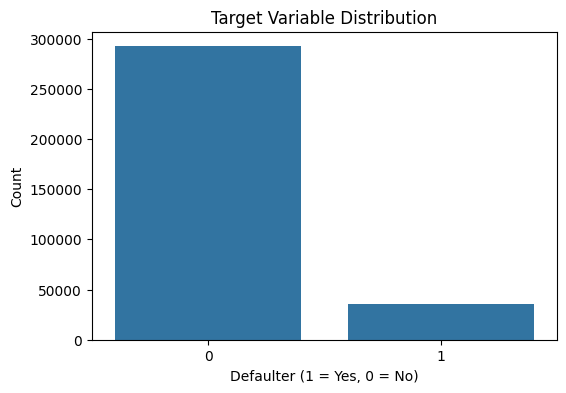

In [ ]:
# Check target distribution
import seaborn as sns
import matplotlib.pyplot as plt

target_counts = df['TARGET'].value_counts(normalize=True) * 100
print("🔢 Class Distribution (%):")
print(target_counts)

# Optional: Bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TARGET')
plt.title('Target Variable Distribution')
plt.xlabel('Defaulter (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
import tensorflow as tf

In [ ]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# STEP 2: Train-Test Split (Stratified for imbalance)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
# STEP 4: Compute Class Weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights_array))
print("✅ Class Weights:", class_weight_dict)

# STEP 5: Build the Neural Network Model
def build_nn_model():
    model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# STEP 4: Compute Class Weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights_array))
print("✅ Class Weights:", class_weight_dict)

# STEP 5: Build the Neural Network Model
def build_nn_model():
    model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# STEP 6: Compile the Model
    model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)
    return model

# STEP 7: Train the Model with Validation
nn = build_nn_model()
history = nn.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weight_dict,
    verbose=2
)

# STEP 8: Save the Model
nn.save("defaulter_model.h5")
print("📦 Model saved as defaulter_model.h5")


✅ Class Weights: {0: np.float64(0.5606170109948383), 1: np.float64(4.624254823803309)}
✅ Class Weights: {0: np.float64(0.5606170109948383), 1: np.float64(4.624254823803309)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
513/513 - 11s - 21ms/step - accuracy: 0.7284 - auc: 0.8033 - loss: 0.5438 - val_accuracy: 0.7610 - val_auc: 0.8348 - val_loss: 0.4961
Epoch 2/50
513/513 - 9s - 18ms/step - accuracy: 0.7530 - auc: 0.8311 - loss: 0.5091 - val_accuracy: 0.7631 - val_auc: 0.8408 - val_loss: 0.4863
Epoch 3/50
513/513 - 4s - 7ms/step - accuracy: 0.7566 - auc: 0.8393 - loss: 0.4977 - val_accuracy: 0.7698 - val_auc: 0.8434 - val_loss: 0.4830
Epoch 4/50
513/513 - 4s - 7ms/step - accuracy: 0.7588 - auc: 0.8434 - loss: 0.4918 - val_accuracy: 0.7641 - val_auc: 0.8466 - val_loss: 0.4883
Epoch 5/50
513/513 - 6s - 13ms/step - accuracy: 0.7594 - auc: 0.8457 - loss: 0.4881 - val_accuracy: 0.7696 - val_auc: 0.8483 - val_loss: 0.4640
Epoch 6/50
513/513 - 4s - 8ms/step - accuracy: 0.7618 - auc: 0.8487 - loss: 0.4836 - val_accuracy: 0.7676 - val_auc: 0.8495 - val_loss: 0.4663
Epoch 7/50
513/513 - 4s - 8ms/step - accuracy: 0.7623 - auc: 0.8511 - loss: 0.4798 - val_accuracy: 0.7788 - val_auc: 0.8504 - val_loss: 0.

📦 Model saved as defaulter_model.h5


In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Assuming X and y are already defined and preprocessed from the previous steps
# X = df.drop(columns=['TARGET'])  # Features
# y = df['TARGET']                 # Target

# --- Cross-Validation Setup ---
n_splits = 5  # Define the number of folds for cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# --- Store Results ---
fold_results = []
all_confusion_matrices = []
all_classification_reports = []

# --- K-Fold Cross-Validation Loop ---
fold_no = 1
for train_index, val_index in kf.split(X):
    print(f"--- Processing Fold {fold_no}/{n_splits} ---")

    # Split data into training and validation sets for the current fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Scale the data for the current fold
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Compute Class Weights for the current fold's training data (optional but recommended for imbalance)
    class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights_array))
    print("✅ Class Weights for this fold:", class_weight_dict)

    # Build the Neural Network Model
    # Model architecture is defined inside the loop to ensure a fresh start for each fold
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the Model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    # Train the Model
    history = model.fit(
        X_train_scaled, y_train,
        epochs=50, # You might adjust epochs based on monitoring validation performance
        batch_size=512,
        validation_data=(X_val_scaled, y_val),
        class_weight=class_weight_dict,
        verbose=0 # Set to 1 or 2 for more detailed output during training
    )

    # Evaluate the Model on the validation set for the current fold
    loss, accuracy, auc = model.evaluate(X_val_scaled, y_val, verbose=0)
    print(f"Fold {fold_no} Evaluation: Loss={loss:.4f}, Accuracy={accuracy:.4f}, AUC={auc:.4f}")

    # Store results for this fold
    fold_results.append({'fold': fold_no, 'loss': loss, 'accuracy': accuracy, 'auc': auc})

    # Generate and store confusion matrix and classification report for this fold
    y_val_pred_prob = model.predict(X_val_scaled, verbose=0)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int) # Using 0.5 as threshold

    cm = confusion_matrix(y_val, y_val_pred)
    all_confusion_matrices.append({'fold': fold_no, 'confusion_matrix': cm})

    report = classification_report(y_val, y_val_pred, target_names=['Non-Defaulter', 'Defaulter'], output_dict=True)
    all_classification_reports.append({'fold': fold_no, 'report': report})

    fold_no += 1

# --- Summarize Results ---
print("\n--- Cross-Validation Summary ---")
results_df = pd.DataFrame(fold_results)
print(results_df)

print("\nMean Performance Across Folds:")
print(results_df[['accuracy', 'auc', 'loss']].mean())

# You can further analyze the stored confusion matrices and classification reports
# For example, to see the report for the first fold:
# print("\nClassification Report for Fold 1:")
# print(all_classification_reports[0]['report'])

--- Processing Fold 1/5 ---
✅ Class Weights for this fold: {0: np.float64(0.5607131858543345), 1: np.float64(4.617721652752826)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 Evaluation: Loss=0.4010, Accuracy=0.8083, AUC=0.8700
--- Processing Fold 2/5 ---
✅ Class Weights for this fold: {0: np.float64(0.5607899419927791), 1: np.float64(4.612522430597093)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 Evaluation: Loss=0.4329, Accuracy=0.7865, AUC=0.8713
--- Processing Fold 3/5 ---
✅ Class Weights for this fold: {0: np.float64(0.56044205036125), 1: np.float64(4.636193238081765)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 Evaluation: Loss=0.4141, Accuracy=0.8007, AUC=0.8738
--- Processing Fold 4/5 ---
✅ Class Weights for this fold: {0: np.float64(0.5605594776384263), 1: np.float64(4.628172992056487)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 Evaluation: Loss=0.4118, Accuracy=0.8003, AUC=0.8745
--- Processing Fold 5/5 ---
✅ Class Weights for this fold: {0: np.float64(0.5606170109948383), 1: np.float64(4.624254823803309)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 Evaluation: Loss=0.4184, Accuracy=0.7976, AUC=0.8682

--- Cross-Validation Summary ---
   fold      loss  accuracy       auc
0     1  0.400966  0.808321  0.869996
1     2  0.432850  0.786489  0.871347
2     3  0.414146  0.800720  0.873842
3     4  0.411825  0.800323  0.874472
4     5  0.418424  0.797593  0.868159

Mean Performance Across Folds:
accuracy    0.798689
auc         0.871563
loss        0.415642
dtype: float64


In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
# 9. Train LightGBM model
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(n_estimators=200, class_weight='balanced', random_state=42)
lgbm.fit(X_train_scaled, y_train)

# 10. Wrap NN for stacking
from scikeras.wrappers import KerasClassifier
nn_wrapper = KerasClassifier(build_fn=build_nn_model,
                             epochs=50,
                             batch_size=512,
                             class_weight=class_weight_dict,
                             verbose=0)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28349, number of negative: 233837
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.547382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26583
[LightGBM] [Info] Number of data points in the train set: 262186, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score
)

# 1) Prepare storage for out-of-fold predictions
n_train = X_train_scaled.shape[0]
oof_probs = np.zeros((n_train, 2))  # col0: NN, col1: LGBM

kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    # a) Train fresh copies on the train-fold
    nn_fold = build_nn_model()
    nn_fold.fit(
        X_train_scaled[train_idx],
        y_train.iloc[train_idx],         # ← use original y_train here
        epochs=50,
        batch_size=512,
        class_weight=class_weight_dict,
        verbose=0
    )

    lgbm_fold = lgb.LGBMClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42
    )
    lgbm_fold.fit(
        X_train_scaled[train_idx],
        y_train.iloc[train_idx]          # ← and here
    )

    # b) Predict on the fold’s validation slice
    oof_probs[val_idx, 0] = nn_fold.predict(X_train_scaled[val_idx]).ravel()
    oof_probs[val_idx, 1] = lgbm_fold.predict_proba(X_train_scaled[val_idx])[:, 1]

# 2) Train meta-learner on those OOF predictions
meta = LogisticRegression(class_weight='balanced', max_iter=1000)
meta.fit(oof_probs, y_train.values)

# 3) Build meta-features for your held-out validation set
val_probs_nn   = nn.predict(X_val_scaled).ravel()
val_probs_lgbm = lgbm.predict_proba(X_val_scaled)[:, 1]
meta_features  = np.vstack([val_probs_nn, val_probs_lgbm]).T

# 4) Meta-model’s final probabilities
final_probs = meta.predict_proba(meta_features)[:, 1]

# 5) Threshold tuning
precision, recall, thresholds = precision_recall_curve(y_val, final_probs)
target_recall = 0.85
ix = np.argmin(np.abs(recall - target_recall))
opt_thresh = thresholds[ix]

# 6) Evaluate at that threshold
y_pred = (final_probs >= opt_thresh).astype(int)
print(f"Blended Precision: {precision_score(y_val, y_pred):.3f}")
print(f"Blended Recall   : {recall_score   (y_val, y_pred):.3f}")
print(f"Blended ROC AUC  : {roc_auc_score(y_val, final_probs):.3f}")



[LightGBM] [Info] Number of positive: 14175, number of negative: 116918
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.456906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26551
[LightGBM] [Info] Number of data points in the train set: 131093, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
4097/4097 ━━━━━━━━━━━━━━━━━━━━ 57s 14ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 14174, number of negative: 116919
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.276301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26556
[LightGBM] [Info] Number of data points in the train set: 131093, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
4097/4097 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2049/2049 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Blended Precision: 0.373
Blended Recall   : 0.850
Blended ROC AUC  : 0.919


In [ ]:
# 7) Save the blended pipeline
import joblib
joblib.dump({
    'nn_model'  : nn,
    'lgbm_model': lgbm,
    'meta_model': meta,
    'scaler'    : scaler,
    'threshold' : opt_thresh
}, 'defaulter_blend.pkl')
print("✅ Blended pipeline saved to defaulter_blend.pkl")


✅ Blended pipeline saved to defaulter_blend.pkl


In [ ]:
from sklearn.metrics import classification_report

# assuming you’ve already got:
#   final_probs = meta.predict_proba(meta_features)[:,1]
#   opt_thresh  = your chosen threshold (e.g. for 85% recall)
#   y_pred      = (final_probs >= opt_thresh).astype(int)

print(classification_report(
    y_val,
    y_pred,
    target_names=['Non-Defaulter','Defaulter']
))


               precision    recall  f1-score   support

Non-Defaulter       0.98      0.83      0.90     58455
    Defaulter       0.37      0.85      0.52      7091

     accuracy                           0.83     65546
    macro avg       0.68      0.84      0.71     65546
 weighted avg       0.91      0.83      0.86     65546



USE PRECISION RECALL TRADEOFF (OPTIONAL)


**CONFUSION MATRIX**

Confusion matrix:
[[48308 10147]
 [ 1064  6027]]
True Negatives : 48308
False Positives: 10147
False Negatives: 1064
True Positives : 6027


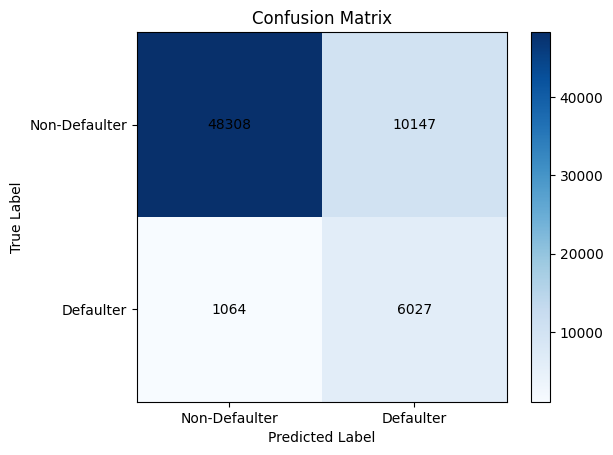

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1. Assuming you already have:
#    final_probs = meta.predict_proba(meta_features)[:, 1]
#    opt_thresh  = your chosen threshold (e.g. ~0.37)
#    y_pred      = (final_probs >= opt_thresh).astype(int)

# 2. Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion matrix:")
print(cm)
print(f"True Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives : {tp}")

# 3. (Optional) Plot it with Matplotlib
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues', interpolation='nearest')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Non-Defaulter', 'Defaulter'])
ax.set_yticklabels(['Non-Defaulter', 'Defaulter'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# annotate each cell
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center')

plt.colorbar(im, ax=ax)
plt.show()
